### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [1]:
# Mount google drive for data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Unzip the dataset
!unzip "/content/gdrive/MyDrive/CNN_assignment.zip" > /dev/null

In [4]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [5]:
# Counting the number of image in Train and Test directory

# Train Image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

# Test Image count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Create a dataset

In [8]:
batch_size = 32
img_height = 180
img_width = 180

# Train datset using keras.preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                      data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),
                      seed=123,subset="training",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
# Validation Dataset using keras.preprocessing
val_ds =tf.keras.preprocessing.image_dataset_from_directory(
                      data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),
                      seed=123,subset="validation",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# All the classes of skin cancer
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

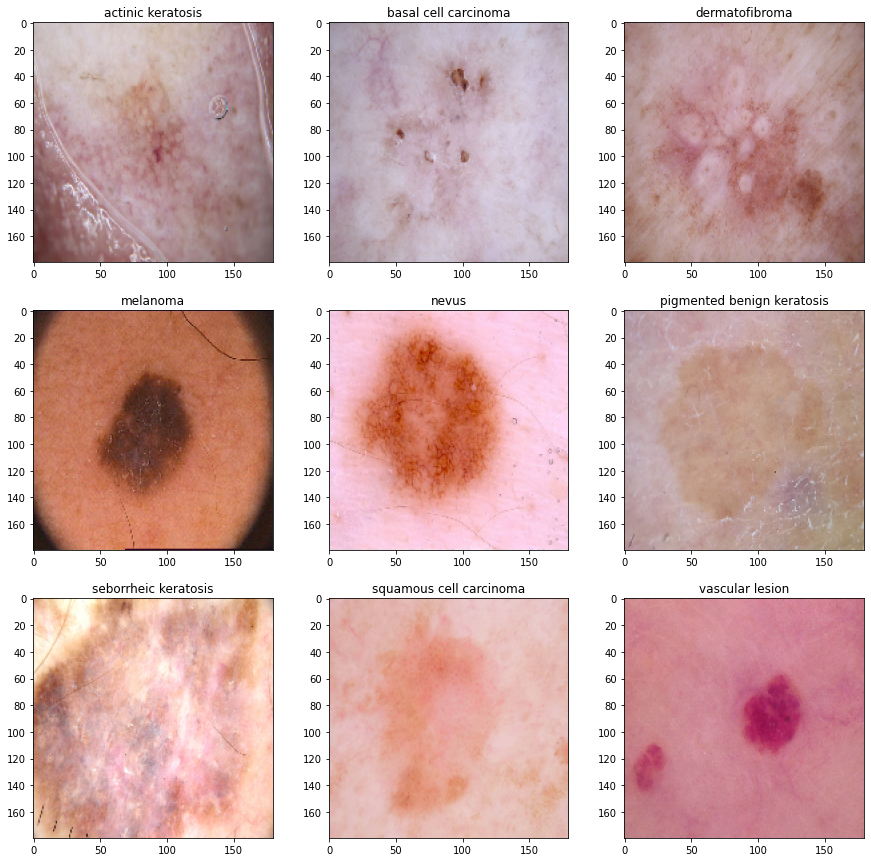

In [11]:
# Importing library for image data visualization
from tensorflow.keras.preprocessing.image import load_img

# Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))
    
# Visualizing image 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(c)

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model 1 Creation

In [13]:
# Creating base model1 wothout any droupout layer
input_shape = (img_height,img_width,3)

# Creating model layer-by-layer  
model1 = Sequential()

# First Convulation Layer
model1.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))
model1.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2,2)))

# Second Convulation Layer
model1.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2,2)))

# Flatten layer
model1.add(layers.Flatten()) 

# Dense Layer
model1.add(layers.Dense(512,activation='relu'))

# Dense Layer
model1.add(layers.Dense(128,activation='relu'))

# Dense (output) Layer with softmax activation function
model1.add(layers.Dense(len(class_names),activation='softmax'))

### Compile the model

In [14]:
# Choosing optimizer as Adam and loss function as sparse_categorical_crossentropy
model1.compile(optimizer='Adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [15]:
# Summary of all layers
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 118336)            0

### Train the model

In [16]:
# Training for 20 epochs
epochs = 20
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 24s 95ms/step - loss: 3.0056 - accuracy: 0.2299 - val_loss: 1.8600 - val_accuracy: 0.3065
Epoch 2/20
56/56 [==============================] - 3s 45ms/step - loss: 1.7167 - accuracy: 0.3878 - val_loss: 1.5127 - val_accuracy: 0.4877
Epoch 3/20
56/56 [==============================] - 2s 44ms/step - loss: 1.5274 - accuracy: 0.4581 - val_loss: 1.4383 - val_accuracy: 0.5078
Epoch 4/20
56/56 [==============================] - 2s 45ms/step - loss: 1.3734 - accuracy: 0.5100 - val_loss: 1.5149 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 2s 44ms/step - loss: 1.3163 - accuracy: 0.5285 - val_loss: 1.5096 - val_accuracy: 0.4743
Epoch 6/20
56/56 [==============================] - 3s 46ms/step - loss: 1.2481 - accuracy: 0.5619 - val_loss: 1.4698 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 3s 45ms/step - loss: 1.1172 - accuracy: 0.5848 - val_loss: 1.5005 - val_accuracy: 0.5101
Epoch 8/20
5

After 20 epoch, Training accuracy is 90% whereas validation accuracy is 52%

### Visualizing training results

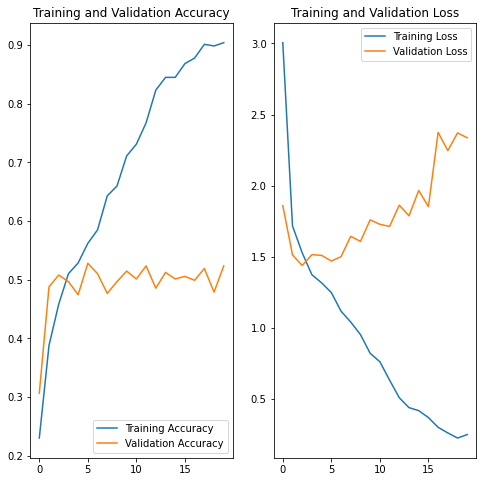

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings after model fit: <br>
* Model is completely overfitting. From the above Training vs Validation accuracy graph, we can see that as the epoch increases the difference between Training accuracy and validation accuracy increases

In [18]:
# Data augumentation strategy

rescale = tf.keras.Sequential([
  # To rescale input in the [0, 1] range  
  layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
   # Randomly flip each image horizontally and vertically
   layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    
   # Randomly rotate each image
   layers.experimental.preprocessing.RandomRotation(0.2),
    
   # Randomly zoom each image during training
   layers.experimental.preprocessing.RandomZoom(0.2),
    
   # Randomly translate each image during training
   layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)    
])

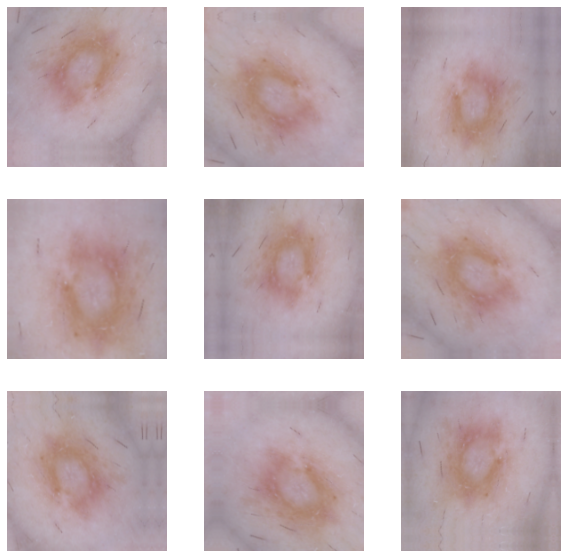

In [19]:
# Visualizing augmentation image for one instance of training image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):   
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off") 

### Model 2 Creation

In [20]:
# Creating Model2 with augmentation layer and dropout layers to overcome overfitting
# For creating model layer-by-layer
model2 = Sequential()

# Augmentation layer
model2.add(data_augmentation)     
# Rescaling layer        
model2.add(rescale)                     

# Convulation Layer
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

# Dropout layer with 25% Fraction of the input units to drop
model2.add(layers.Dropout(0.25))

# Convulation Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

# Dropout layer with 25% Fraction of the input units to drop
model2.add(layers.Dropout(0.25))

# Flatten layer
model2.add(layers.Flatten())

# Dense Layer
model2.add(layers.Dense(512,activation='relu'))

# Dense Layer
model2.add(layers.Dense(128,activation='relu'))

# Dropout layer with 50% Fraction of the input units to drop
model2.add(layers.Dropout(0.50))

# Dense Layer with softmax activation function.
model2.add(layers.Dense(len(class_names),activation='softmax'))


### Compile the model

In [21]:
# Choosing optimizer as Adam and loss function as sparse_categorical_crossentropy
model2.compile(optimizer='Adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

### Train the model

In [22]:
# Training for 20 epochs
epochs =20
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/20


56/56 [==============================] - 14s 169ms/step - loss: 3.2797 - accuracy: 0.1825 - val_loss: 2.1448 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 9s 165ms/step - loss: 1.9640 - accuracy: 0.2773 - val_loss: 1.8773 - val_accuracy: 0.3333
Epoch 3/20
56/56 [==============================] - 9s 165ms/step - loss: 1.7905 - accuracy: 0.3549 - val_loss: 1.9049 - val_accuracy: 0.3781
Epoch 4/20
56/56 [==============================] - 11s 192ms/step - loss: 1.7444 - accuracy: 0.3778 - val_loss: 1.8807 - val_accuracy: 0.3915
Epoch 5/20
56/56 [==============================] - 10s 177ms/step - loss: 1.6940 - accuracy: 0.3929 - val_loss: 1.7265 - val_accuracy: 0.4340
Epoch 6/20
56/56 [==============================] - 10s 184ms/step - loss: 1.6271 - accuracy: 0.4252 - val_loss: 1.7552 - val_accuracy: 0.4049
Epoch 7/20
56/56 [==============================] - 9s 165ms/step - loss: 1.6080 - accuracy: 0.4314 - val_loss: 1.6701 - val_accuracy: 0.4407
Epoch 8/20
56

We see that after 20 epoch, now training accuracy is ~54% and validation accuracy is ~51%

### Visualizing the results

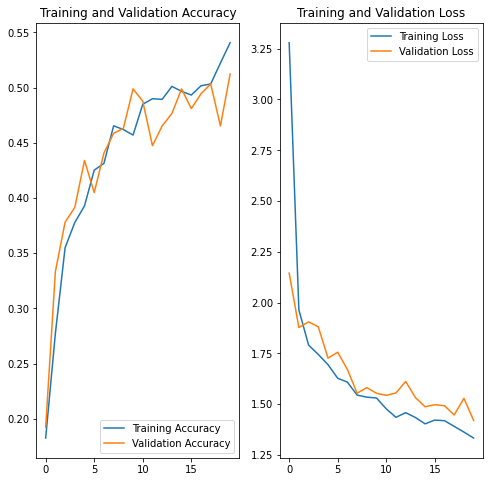

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings after the model fit: <br>
* After using Data augmentation layer and dropout layers, overfitting issue is resolved now. Model does not overfit as there is no much difference between traing accuracy (54%) and validation accuracy (51%)<br>
* Model performance is still not good. Accuracy is less for both training and validation, which tells that model is underfitting now.

### Distribution of classes in the training dataset

In [24]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,dermatofibroma,95
1,basal cell carcinoma,376
2,pigmented benign keratosis,462
3,nevus,357
4,vascular lesion,139
5,seborrheic keratosis,77
6,actinic keratosis,114
7,squamous cell carcinoma,181
8,melanoma,438


We can clearly see that there is class imbalance in the data which might be the reason for poor performance of the model

* seborrheic keratosis	has the least number of samples - 77
* pigmented benign keratosis (462 Samples), melanoma (438 Samples), basal cell carcinoma (376 Samples), and nevus (357 Samples) classes dominates the data in terms of proportionate number of samples

### Class Imbalance Detection

In [25]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) #We are adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4A46AA1650>: 100%|██████████| 500/500 [00:18<00:00, 27.12 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4A46AF6F50>: 100%|██████████| 500/500 [00:20<00:00, 24.60 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4A46D86F50>: 100%|██████████| 500/500 [00:20<00:00, 24.33 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=960x724 at 0x7F4A466E2590>: 100%|██████████| 500/500 [01:23<00:00,  6.02 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4A46DBC3D0>: 100%|██████████| 500/500 [01:24<00:00,  5.90 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4A465B8ED0>: 100%|██████████| 500/500 [00:16<00:00, 30.25 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4A46E0CA90>: 100%|██████████| 500/500 [00:39<00:00, 12.57 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4A46F4C690>: 100%|██████████| 500/500 [00:15<00:00, 31.50 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4A46EF0510>: 100%|██████████| 500/500 [00:16<00:00, 30.37 Samples/s]


In [27]:
# Count total number of image generated by Augmentor
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


#### Seeing the distribution of augmented data after adding new images to the original training data

In [28]:
from glob import glob

In [29]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0029824.jpg_febfac21-a53c-4413-8ee2-2c6424ffc3a7.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0027044.jpg_df315ba7-06d5-4276-9a08-f3f5bd11811c.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0033626.jpg_d41ab7b2-4b26-4b1f-bf94-574da164b43d.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0026254.jpg_a6bc6299-c587-497d-bbfa-5eb97ce161f4.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0026417.jpg_97369d8f-f907-4dd5-b6ad-47d77be3cbd8.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Tr

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [33]:
# Label count
df2['Label'].value_counts()

dermatofibroma                500
basal cell carcinoma          500
pigmented benign keratosis    500
nevus                         500
vascular lesion               500
seborrheic keratosis          500
actinic keratosis             500
squamous cell carcinoma       500
melanoma                      500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [35]:
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/" 

#Training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2, 
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [36]:
# Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Model 3 Creation

In [37]:
# Creating Model3 with no Augmentation layer, but using Augmentor library, Dropout layers and Batch normalization
model3 = Sequential()

model3.add(rescale)   #Rescaling Layer

# First Convulation layer with dropout layer
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

# Second Convulation Layer with dropout layer
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
#model3.add(layers.Dropout(0.25))

# Third Convulation Layer
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

# Flatten Layer
model3.add(layers.Flatten())

#Dense Layer
model3.add(layers.Dense(512,activation='relu'))

#Dropout layer
model3.add(layers.Dropout(0.25))

#Batch normalization
model3.add(layers.BatchNormalization())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model3.add(layers.Dropout(0.50))

#Batch normalization
model3.add(layers.BatchNormalization())

#Dense layer with Softmax activation function
model3.add(layers.Dense(len(class_names),activation='softmax'))


### Compile the Model

In [38]:
# Choosing optimizer as Adam and loss function as sparse_categorical_crossentropy
model3.compile(optimizer='Adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

### Train the model

In [39]:
# Training for 50 epochs
epochs = 50
history = model3.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/50
169/169 [==============================] - 28s 153ms/step - loss: 2.5077 - accuracy: 0.1665 - val_loss: 2.8269 - val_accuracy: 0.1804
Epoch 2/50
169/169 [==============================] - 26s 150ms/step - loss: 1.9337 - accuracy: 0.2865 - val_loss: 3.0317 - val_accuracy: 0.1626
Epoch 3/50
169/169 [==============================] - 26s 150ms/step - loss: 1.6484 - accuracy: 0.3767 - val_loss: 2.2293 - val_accuracy: 0.2004
Epoch 4/50
169/169 [==============================] - 28s 159ms/step - loss: 1.5337 - accuracy: 0.4203 - val_loss: 1.8078 - val_accuracy: 0.3088
Epoch 5/50
169/169 [==============================] - 26s 149ms/step - loss: 1.4886 - accuracy: 0.4358 - val_loss: 1.8522 - val_accuracy: 0.3118
Epoch 6/50
169/169 [==============================] - 26s 149ms/step - loss: 1.4275 - accuracy: 0.4577 - val_loss: 1.5713 - val_accuracy: 0.3964
Epoch 7/50
169/169 [==============================] - 26s 149ms/step - loss: 1.3576 - accuracy: 0.4813 - val_loss: 1.6579 - val_ac

We can see that now the Training accuracy is ~92% and Validation accuracy is ~81% 

### Visualize the model results

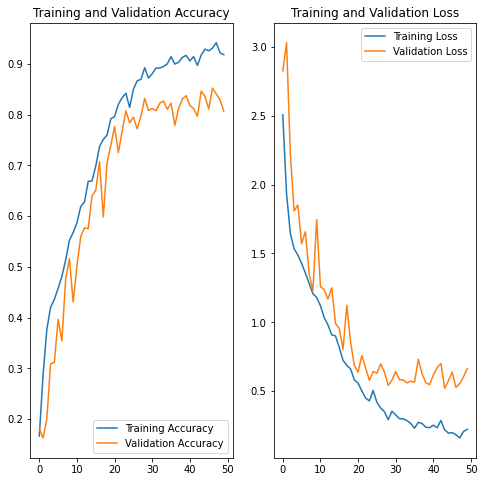

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Analyzing the results: <br>
* We can see that for last model i.e. Model 3, Training accuracy as well as validation accuracy increased. Model is performing much better now.
* There is no overfitting or underfitting observed 
* Class rebalance helped in augmentation and achieving the best Training and Validation accuracy